<a href="https://colab.research.google.com/github/kenltho2/Num-Meth23/blob/main/Project5ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 5: Direct Interpolation
##Aaron Arias Vales, Kennedy Thomas
#### April 17, 2023

**The direct interpolation method is exactly what it sounds like-- a direct approach at interpolating a polynomial estimate of a given function. With $n$ points, we can generate an estimate of our function with a degree of $n-1$. The direct interpolation method works by first constructing a polynomial of the form 
$ \begin{equation*}
a_{o}x^{n-1}+a_{1}x^{n-2}+\cdots+a_{n-1}x^0. 
\end{equation*}$ From here, we will fill in the values of $x$ and each $f(x)$ to create a system of equations to find the coefficients for our polynomial. Note that for this to work we need the same number of equations and the same number of unknowns, hence the number of points necessary. Here we are searching for an interpolation of the line representing $f(x) = e^x$. We use our Gauss-Jordan function to solve our system and find our interpolation with the points $[-2,-1,0,1,2].$**

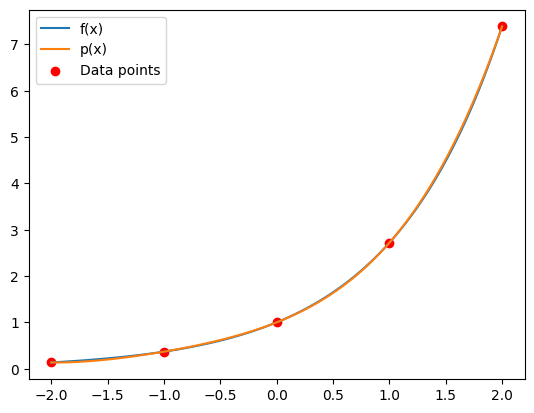

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gauss-Jordan elimination function
def gauss_jordan_elimination(A):
    n = A.shape[0]
    for i in range(n):
        # Find the row with the maximum absolute value in the current column
        max_row = i
        for j in range(i+1, n):
            if abs(A[j,i]) > abs(A[max_row,i]):
                max_row = j
        
        # Swap the current row with the row with maximum absolute value
        A[[i,max_row]] = A[[max_row,i]]
        
        # Normalize the current row
        A[i] = A[i] / A[i,i]
        
        # Eliminate the current column in the other rows
        for j in range(n):
            if j != i:
                A[j] = A[j] - A[j,i] * A[i]
    
    # Extract the solution
    solution = A[:,n]
    
    return solution

# Define the function f that we want to interpolate
def f(x):
    return np.exp(x)

# Define the five points we want to interpolate
x = np.array([-2.0, -1.0, 0.0, 1.0, 2.0])
y = f(x)

# Construct the Vandermonde matrix
V = np.vander(x, increasing=True)

# Solve for the coefficients of the polynomial using Gauss-Jordan elimination
coefficients = gauss_jordan_elimination(np.hstack((V, y[:,np.newaxis])))

# Define the polynomial function using the coefficients
def p(x):
    n = len(coefficients)
    return sum(coefficients[i]*x**i for i in range(n))

# Generate points to plot the original function and the polynomial
t = np.linspace(-2, 2, 100)
plt.plot(t, f(t), label='f(x)')
plt.plot(t, p(t), label='p(x)')
plt.scatter(x, y, color='red', label='Data points')

plt.legend()
plt.show()


**Above we have our graph of our interpolation and the true graph. It is almost indistinguishable from our true function.**


##Linear Spline

**Below is our function creating a linear spline for our chosen function, $f(x)= e^{-x/4}sin(x)$. The linear spline creates a linear approximation of the curve between each given point.**

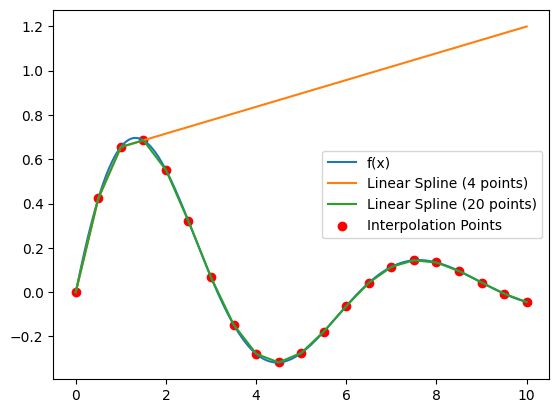

In [ ]:
# Define the function f to interpolate
def f(x):
    return np.exp(-x/4) * np.sin(x)

# Define the linear spline function
def linear_spline(x, x_points, y_points):
    n = len(x_points)
    i = np.searchsorted(x_points, x)
    if i == 0:
        y = ((x_points[1]-x)*y_points[0] + (x-x_points[0])*y_points[1]) / (x_points[1]-x_points[0])
    elif i == n:
        y = ((x_points[n-1]-x)*y_points[n-2] + (x-x_points[n-2])*y_points[n-1]) / (x_points[n-1]-x_points[n-2])
    else:
        y = ((x_points[i]-x)*y_points[i-1] + (x-x_points[i-1])*y_points[i]) / (x_points[i]-x_points[i-1])
    return y

# Define the interval and number of points to evaluate
x_interval = np.linspace(0, 10, 1000)
x_points = np.linspace(0, 10, 21)
y_points = f(x_points)

# Evaluate the linear spline at the specified points
y_spline_4 = np.array([linear_spline(x, x_points[:4], y_points[:4]) for x in x_interval])
y_spline_20 = np.array([linear_spline(x, x_points, y_points) for x in x_interval])

# Plot the function and the linear splines
fig, ax = plt.subplots()
ax.plot(x_interval, f(x_interval), label='f(x)')
ax.plot(x_interval, y_spline_4, label='Linear Spline (4 points)')
ax.plot(x_interval, y_spline_20, label='Linear Spline (20 points)')
ax.scatter(x_points, y_points, label='Interpolation Points', color='red')
ax.legend()
plt.show()


**From the graph of our linear splines, we can clearly see that our spline with 4 points is not accurate after our 4th point, a clear indicator of one weakness of linear interpolation: the estimate is only accurate for the given set of values, and not useful for values outside of the given range. Our spline with 20 points is a much better fit for the range of values given, but for a point far outside our values, it will not follow the curve and will continue on a linear trend with a constant rate of change, compared to our function that has a nonconstant derivative. If you were to choose a random point that was not used in the interpolation, you would probably find a source of error. For example, there is visible error between the third and fourth points of our graph and the splines. The linear spline is great if you need a rough estimate of your function that can be broken into smaller linear segments, but not good for overall estimates of the general function, only the domain that includes your given points will be accurate.**